In [2]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [4]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 6                   # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [6]:
origin = load_data('wage')
origin

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [8]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


In [10]:
origin.isna().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [12]:
df1 = origin.astype({'year' : 'category', 'maritl': 'category', 'race': 'category', 
                     'education': 'category', 'region' : 'category', 'jobclass' : 'category', 
                     'health_ins':'category'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   category
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   object  
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(7), float64(2), int64(1), object(1)
memory usage: 115.7+ KB


In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3000.0,42.414667,11.542406,18.000000,33.750000,42.000000,51.000000,80.000000
logwage,3000.0,4.653905,0.351753,3.000000,4.447158,4.653213,4.857332,5.763128
wage,3000.0,111.703608,41.728595,20.085537,85.383940,104.921507,128.680488,318.342430


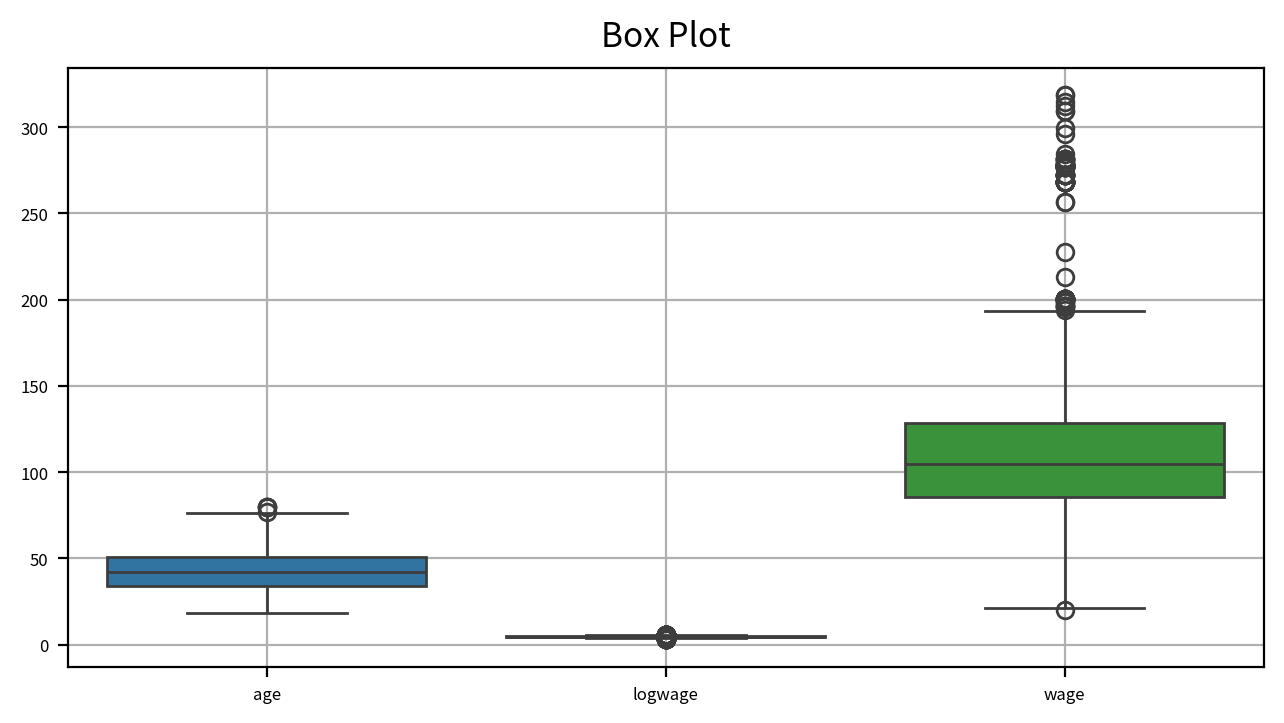

In [17]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.boxplot(data=df1)

ax.set_title("Box Plot", fontsize=12, pad=8)
ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

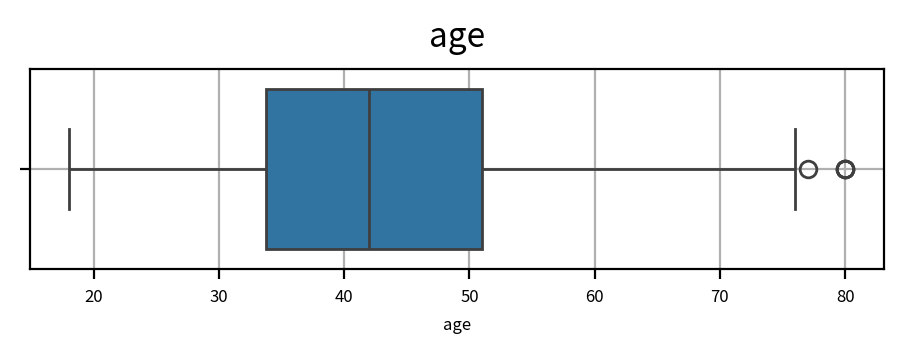

In [19]:
width_px = 900
height_px = 350
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.boxplot(data=df1, x='age')

ax.set_title("age",  fontsize=12, pad=8)

ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

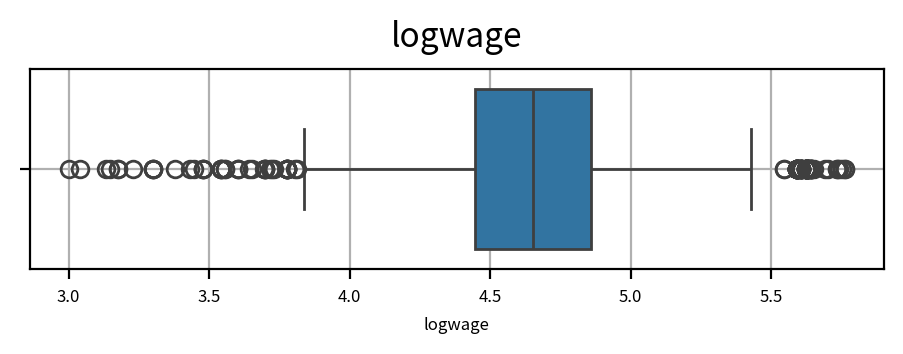

In [22]:
width_px = 900
height_px = 350
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.boxplot(data=df1, x='logwage')

ax.set_title("logwage",  fontsize=12, pad=8)

ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

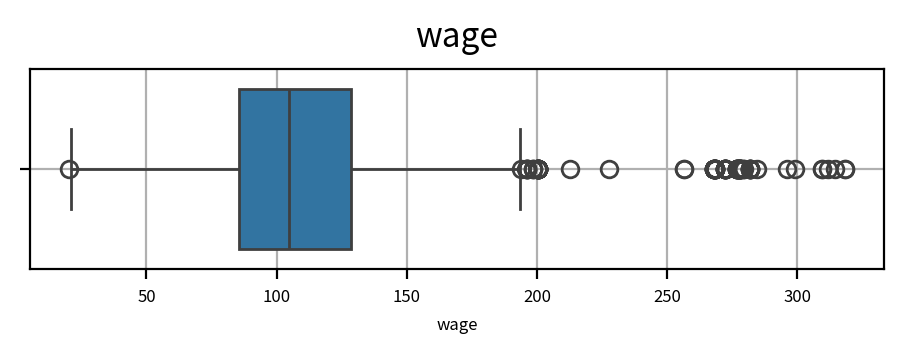

In [24]:
width_px = 900
height_px = 350
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.boxplot(data=df1, x='wage')

ax.set_title("wage", fontsize=12, pad=8)
ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

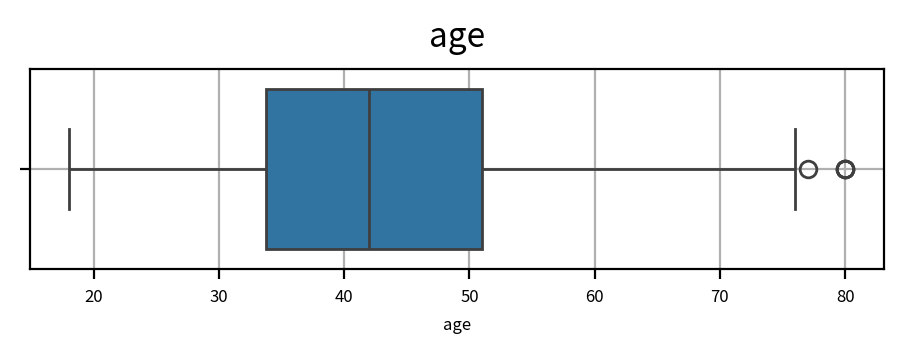

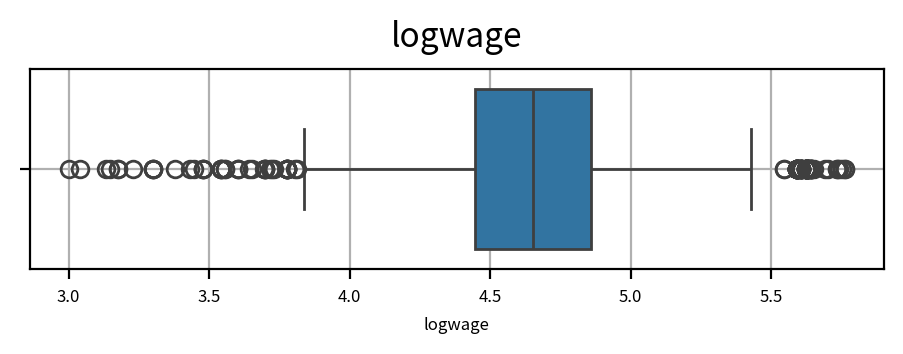

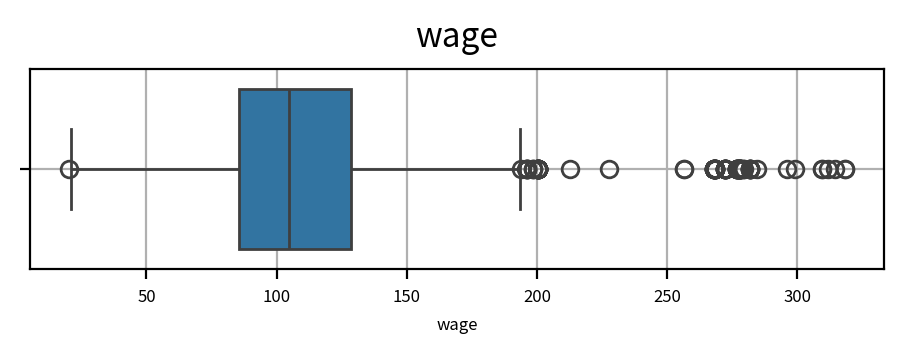

In [28]:
fields = ['age', 'logwage', 'wage']

for f in fields:

    width_px = 900
    height_px = 350
    rows = 1
    cols = 1
    figsize = (width_px/ my_dpi, height_px/ my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)
    
    sb.boxplot(data=df1, x=f)
    
    ax.set_title(f, fontsize=12, pad=8)
    ax.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    plt.close()

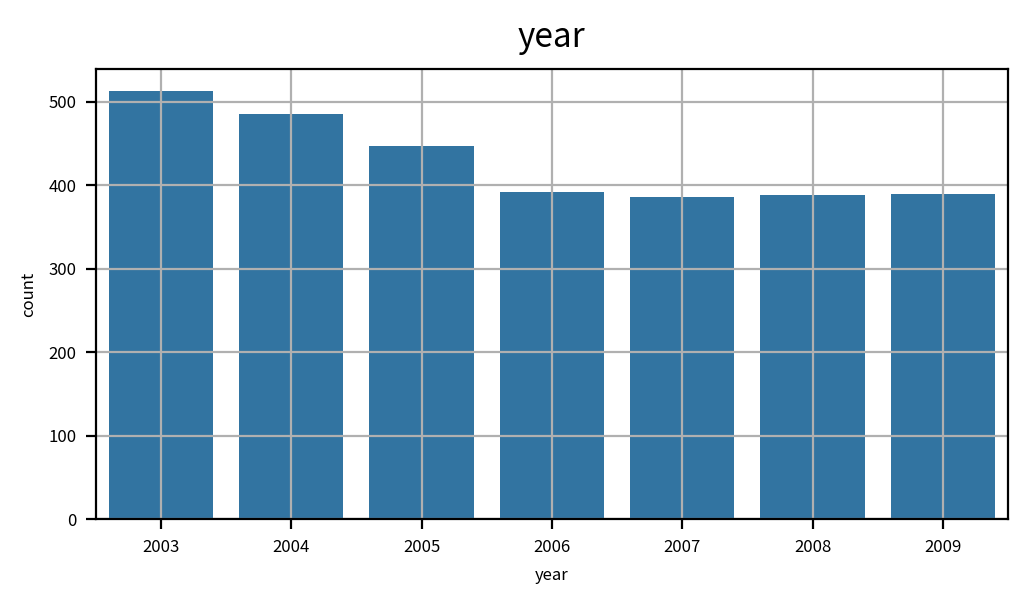

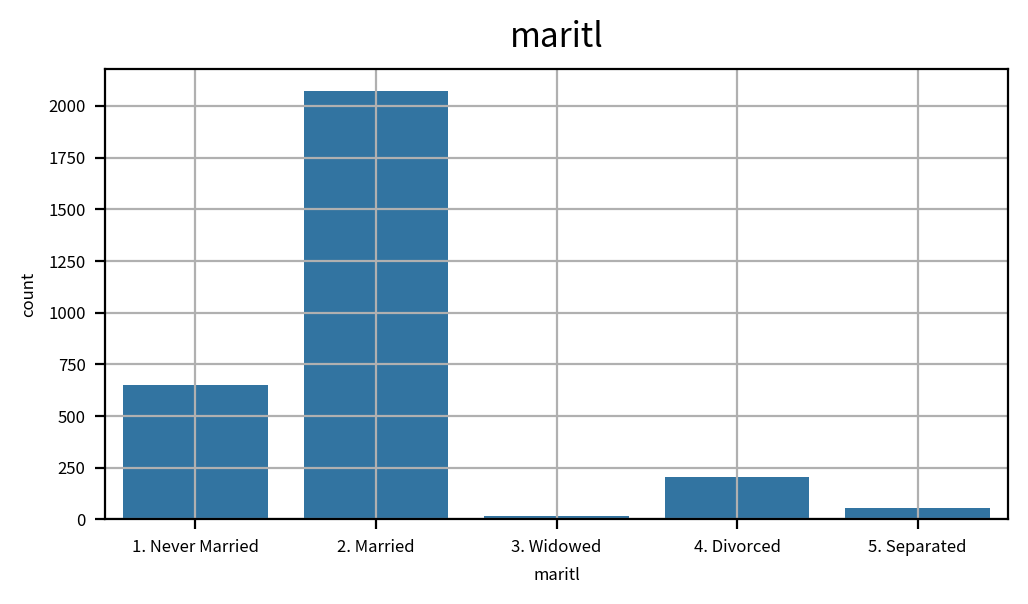

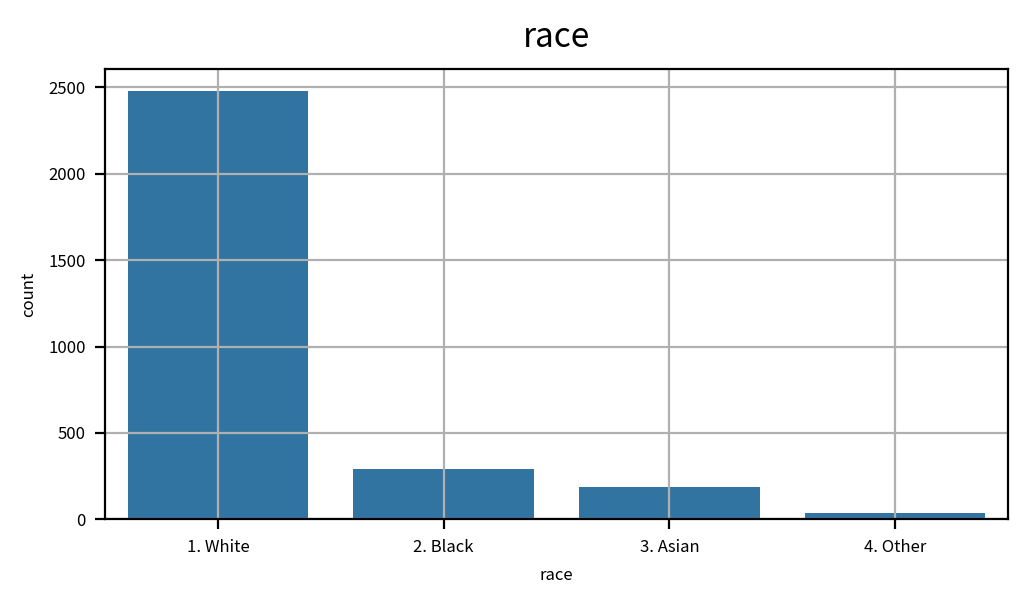

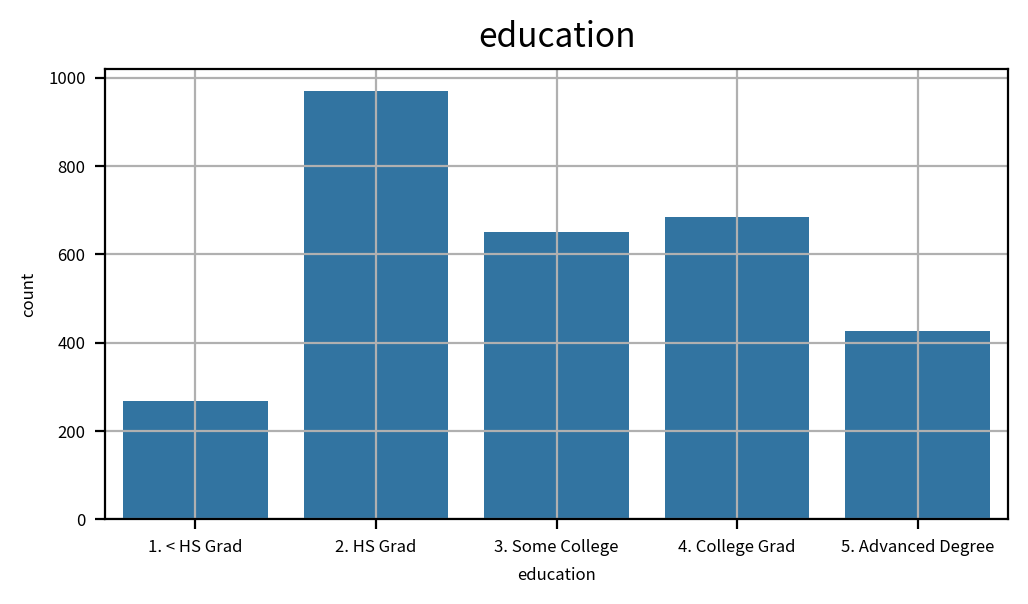

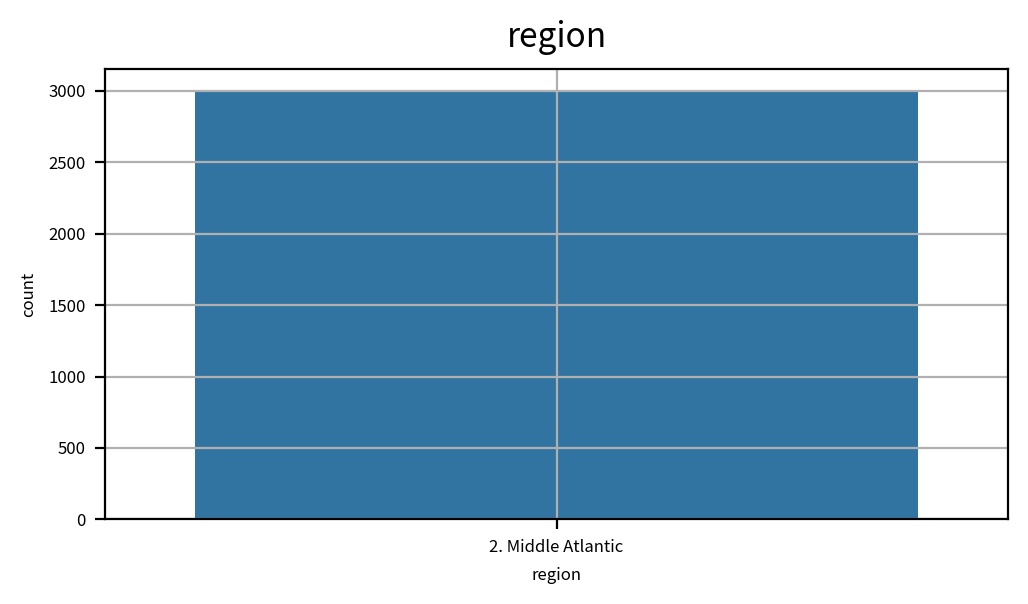

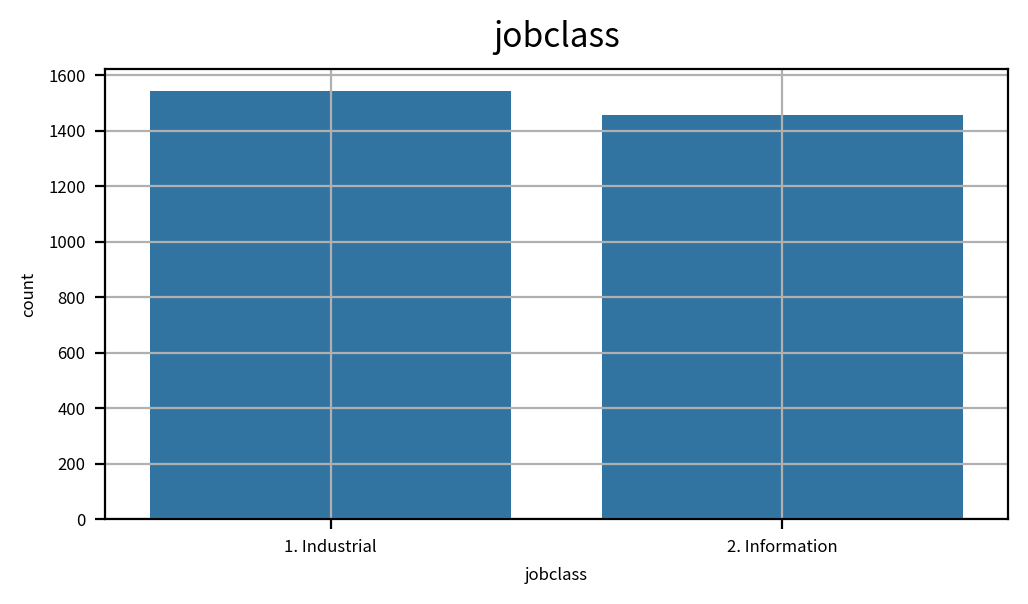

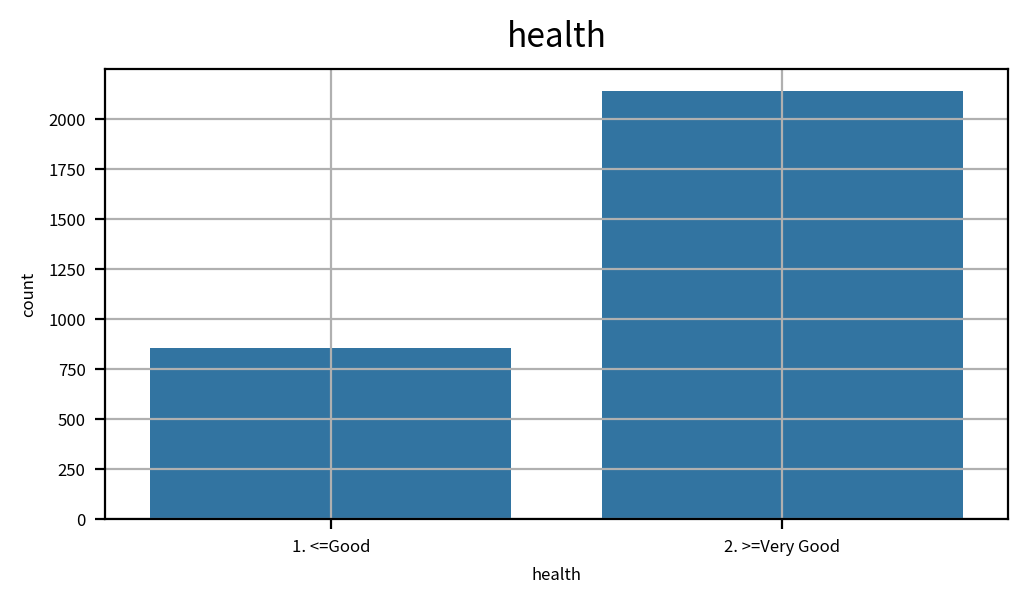

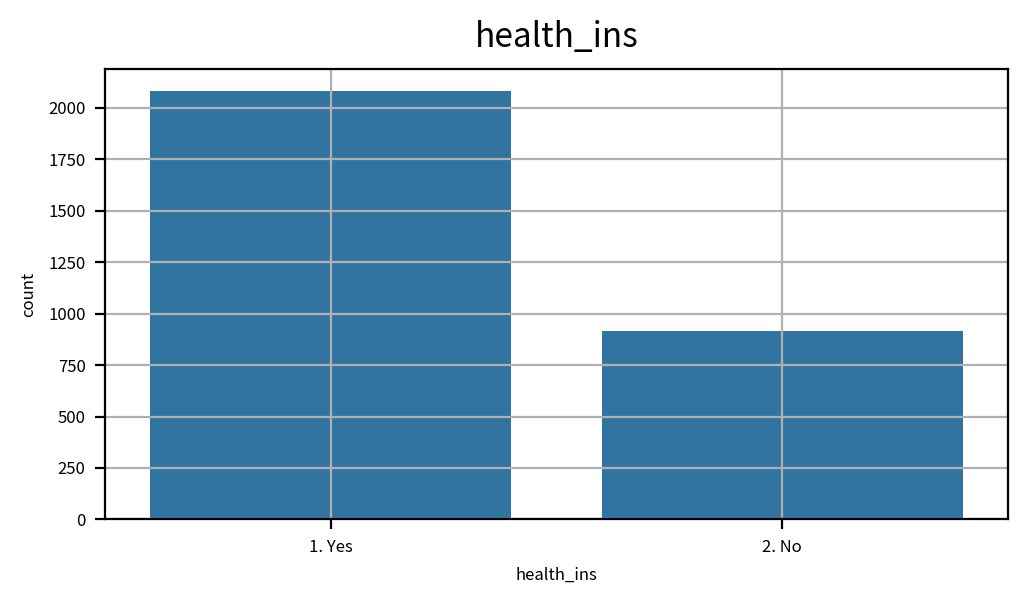

In [30]:
fields = ['year', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins']
for f in fields:

    width_px = 1024
    height_px = 600
    rows = 1
    cols = 1
    figsize = (width_px/ my_dpi, height_px/ my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)
    
    sb.countplot(data=df1, x=f)
    
    ax.set_title(f,  fontsize=12, pad=8)
    ax.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    plt.close()

In [33]:
married = sorted(list(df1['maritl'].unique()))
married

['1. Never Married', '2. Married', '3. Widowed', '4. Divorced', '5. Separated']

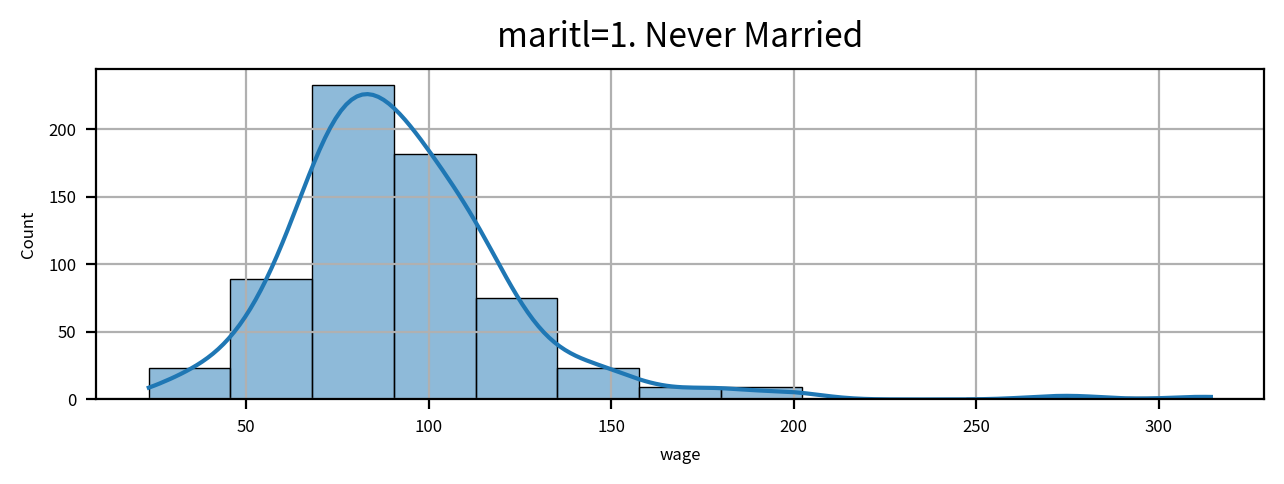

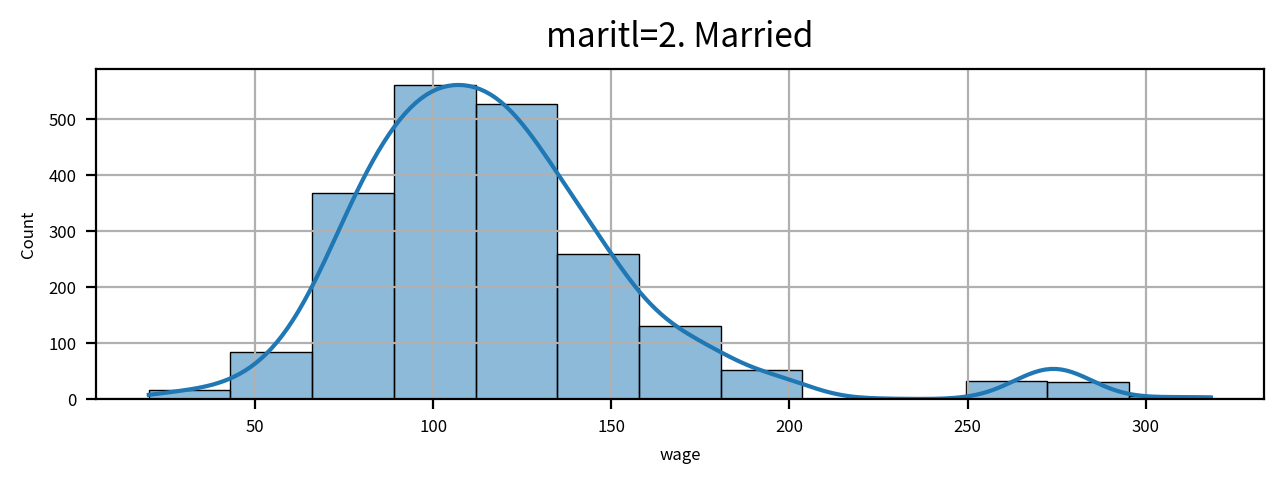

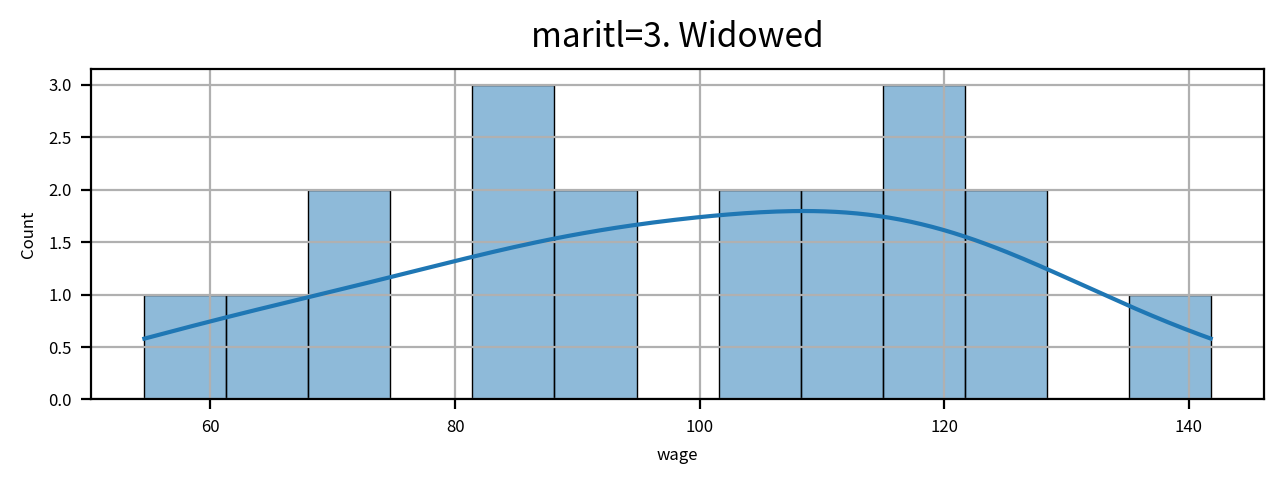

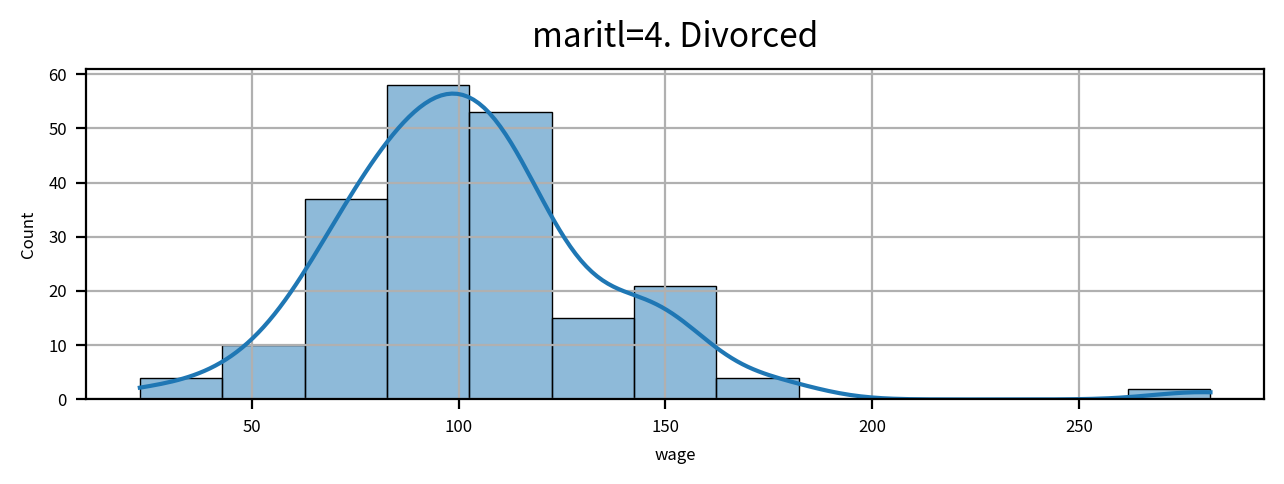

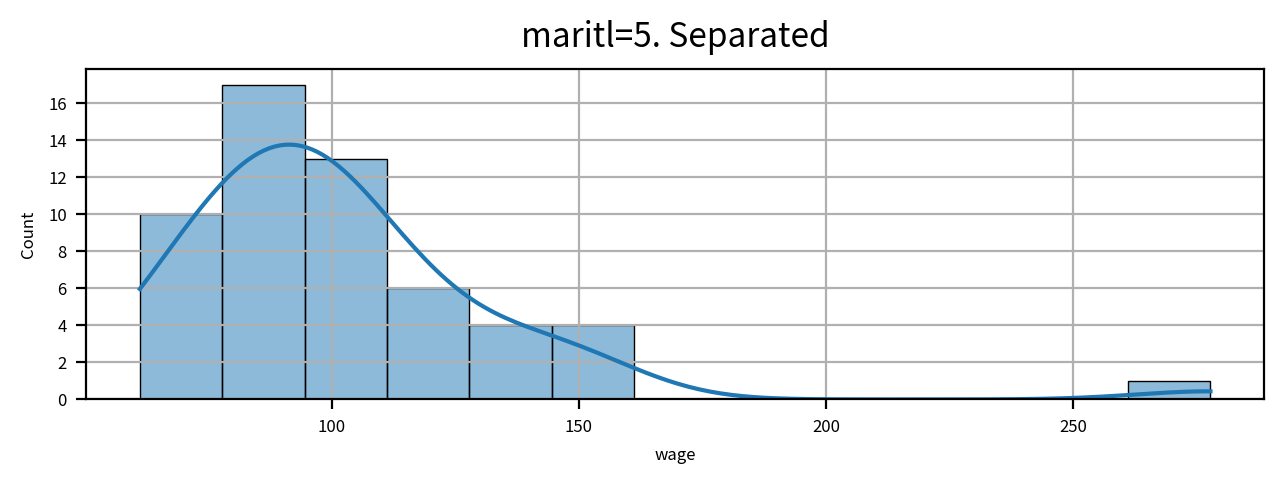

In [35]:
bins_count = 13

for m in married:
    mdf = df1.query("maritl == @m")

    width_px = 1280
    height_px = 480
    rows = 1
    cols = 1
    figsize = (width_px/ my_dpi, height_px/ my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)
    
    sb.histplot(data=mdf, x="wage", bins= bins_count, edgecolor = "#000000", linewidth=0.5,kde=True)
    
    ax.set_title("maritl=%s"%m,  fontsize=12, pad=8)
  
    ax.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    plt.close()

In [37]:
education = sorted(list(df1['education'].unique()))
education

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

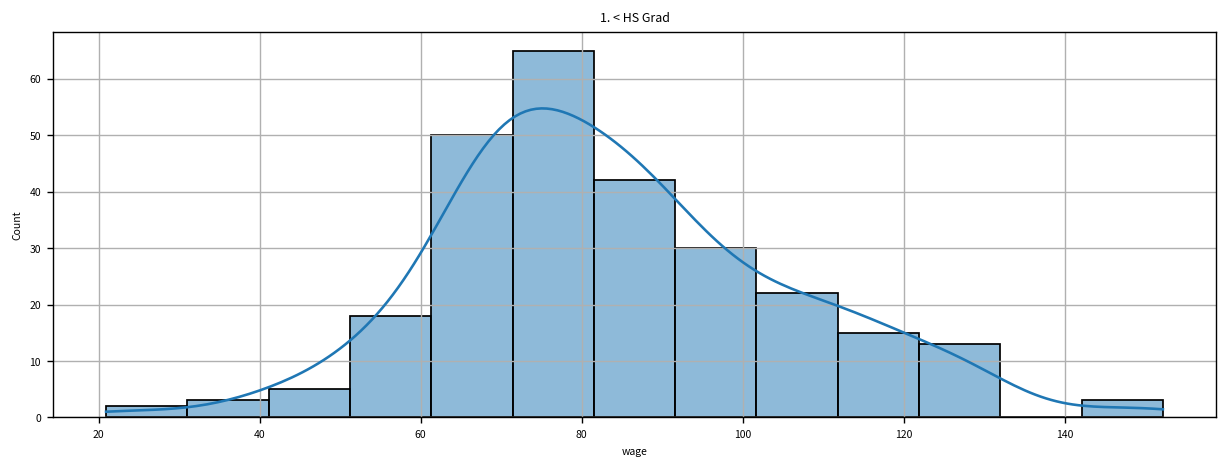

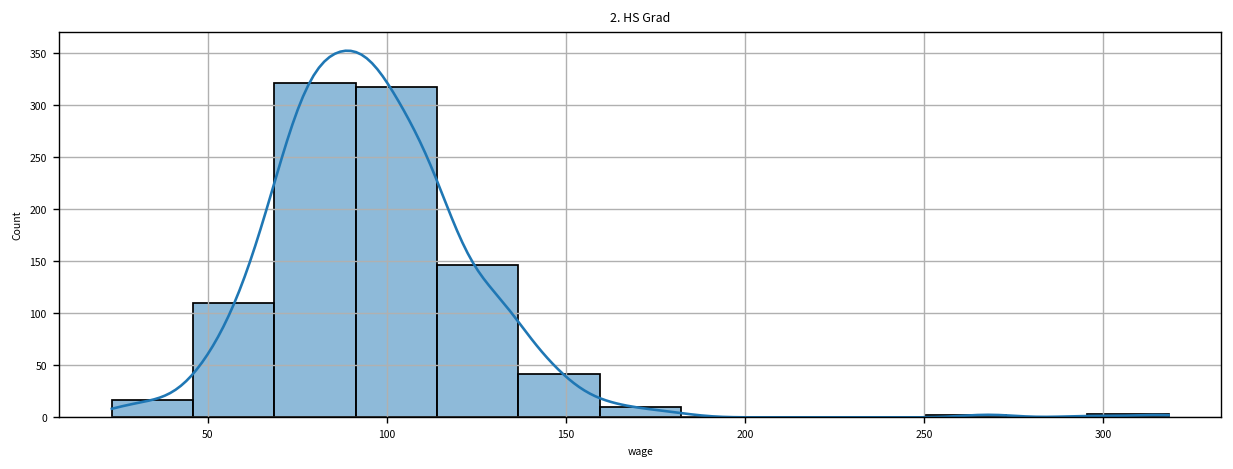

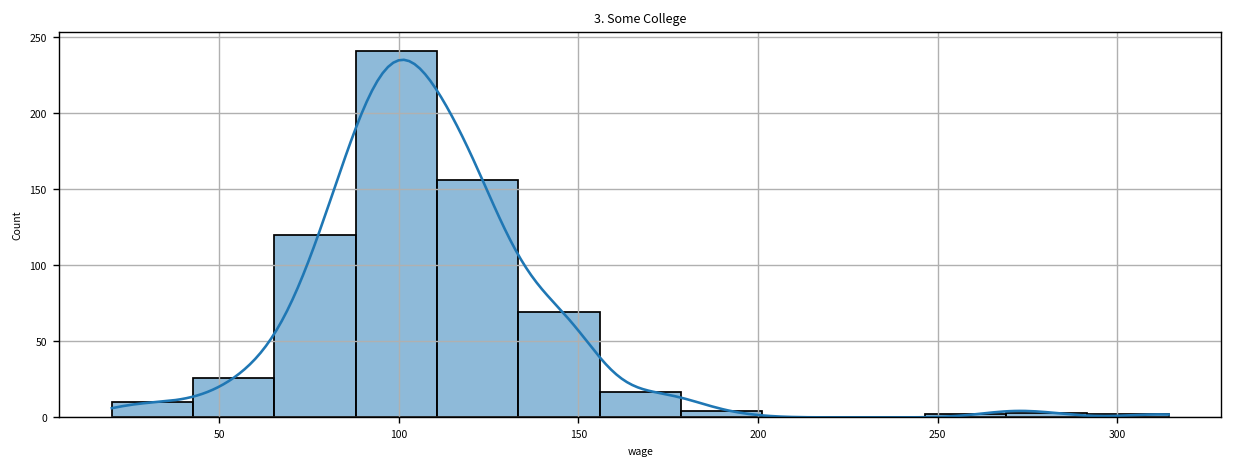

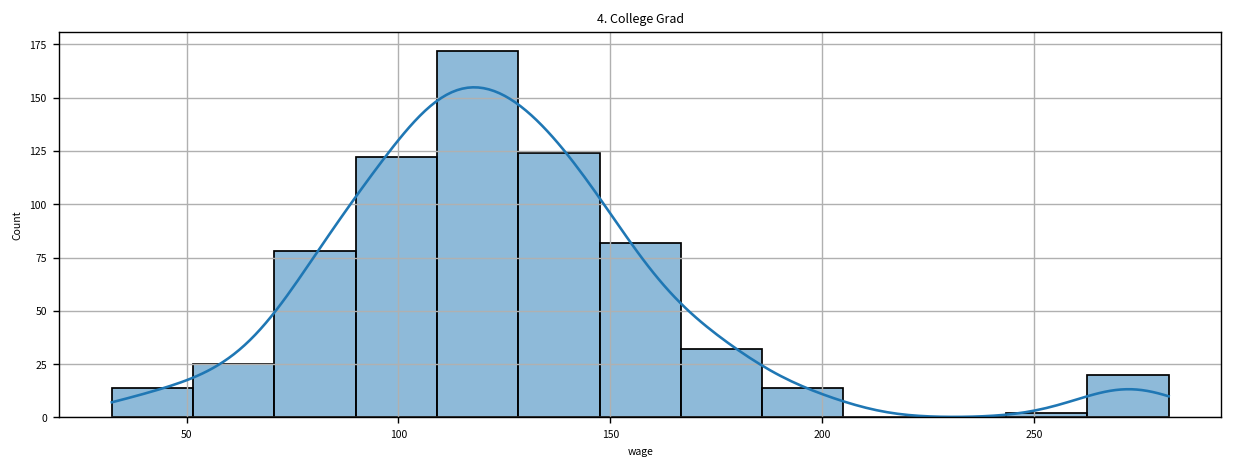

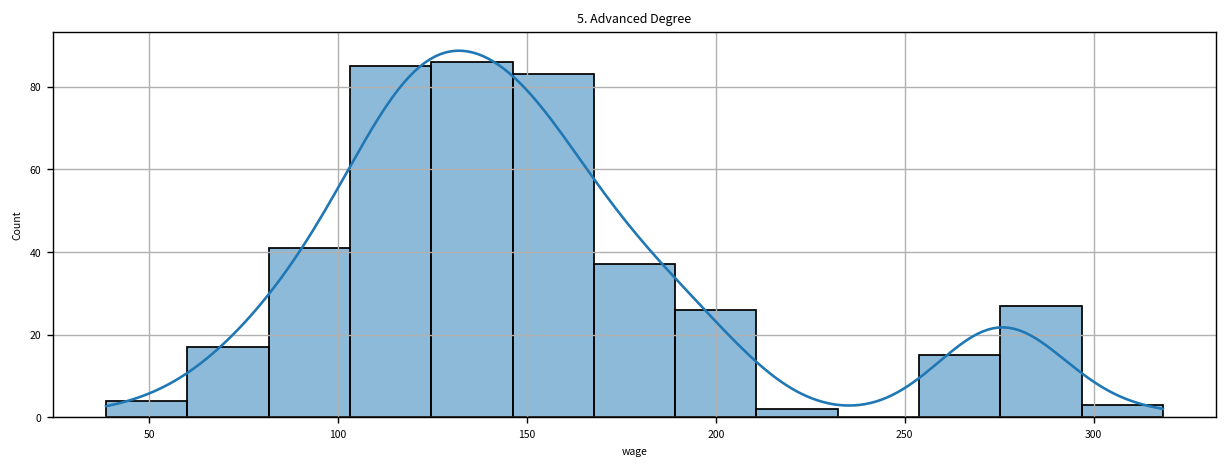

In [40]:
bins_count = 13

for e in education:
    mdf = df1.query("education == @e")

    plt.figure(figsize=(12,4), dpi=125)
    sb.histplot(data=mdf, x='wage', bins=bins_count, kde=True)
    plt.title(e)
    plt.grid()
    plt.show()
    plt.close()


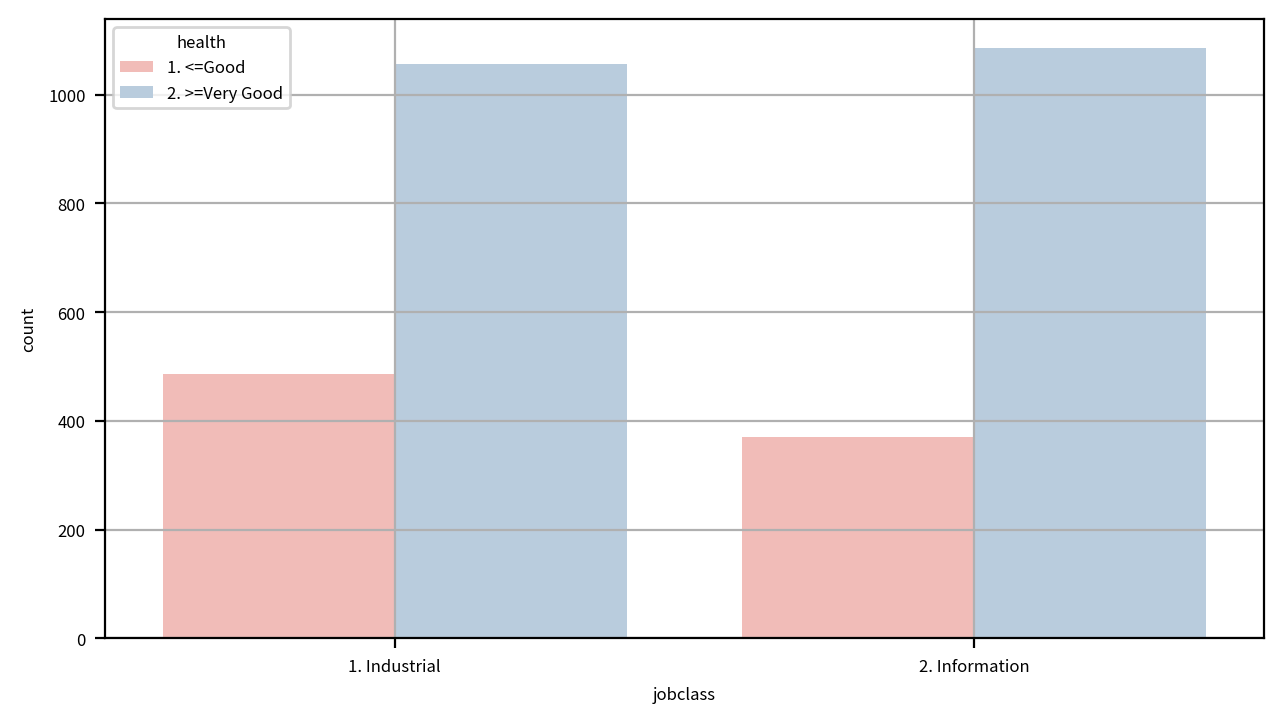

In [42]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.countplot(data=df1, x='jobclass',hue='health',palette="Pastel1")



ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()